<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%EB%A1%A0_4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기계학습론 4주차과제

## 필요한 라이브러리 & 데이터셋 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import scatterplotmatrix

In [ ]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 6)

In [ ]:
df.head()

,age,gender,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


## EDA

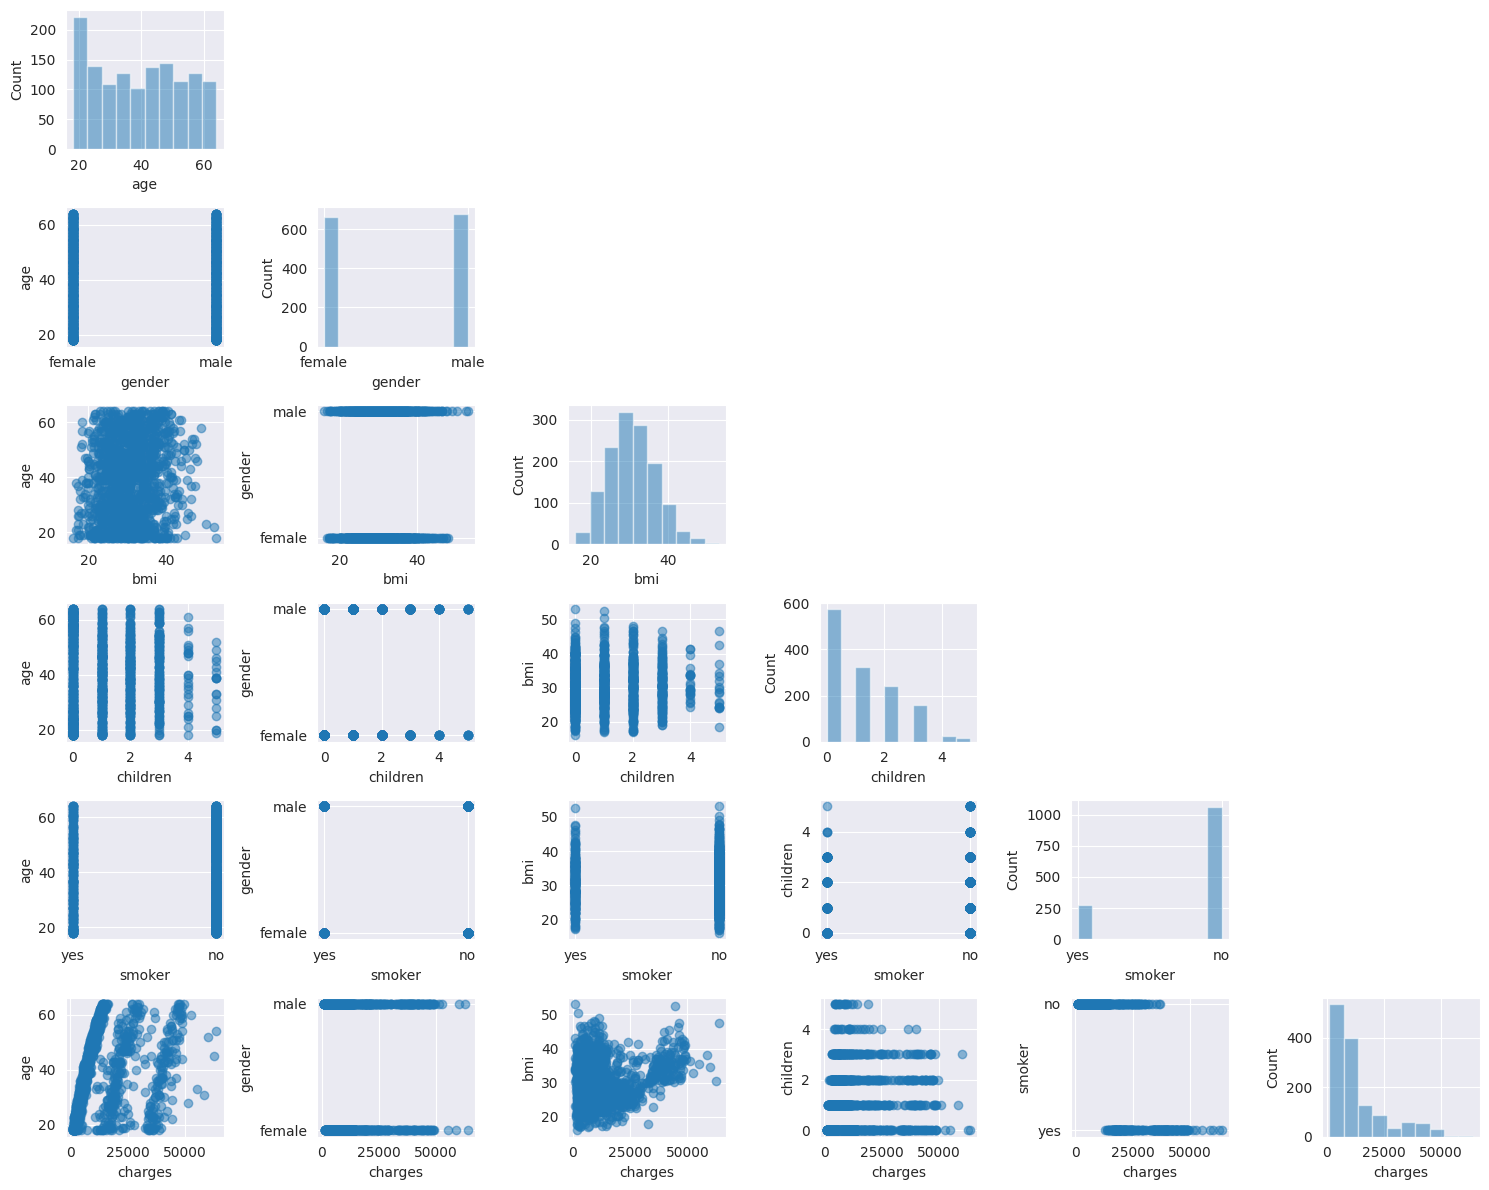

In [ ]:
cols = ['age', 'gender', 'bmi', 'children', 'smoker','charges']

scatterplotmatrix(df[cols].values, figsize=(15, 12),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: >

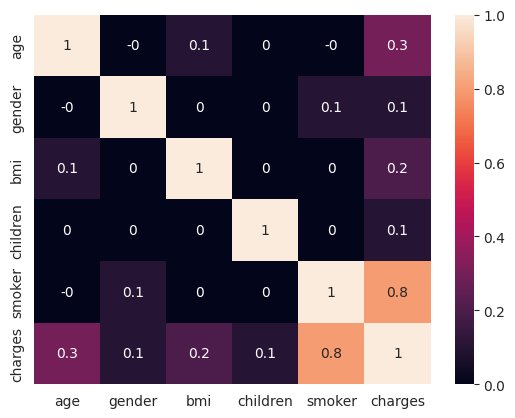

In [ ]:
correlation_matrix = df.corr().round(1)
sns.heatmap(data=correlation_matrix,annot=True)

<Axes: xlabel='smoker', ylabel='charges'>

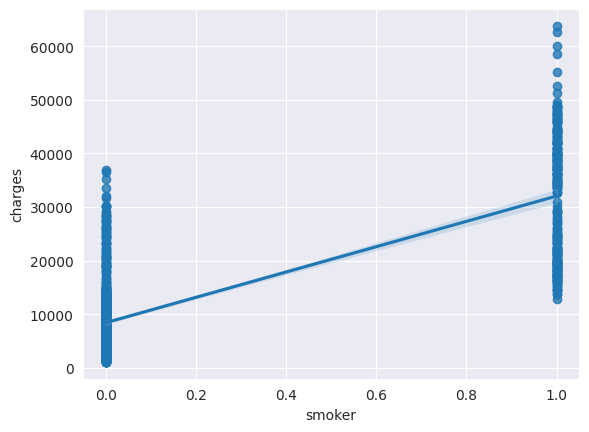

In [ ]:
sns.regplot(x='smoker', y='charges', data=df)

## 데이터 라벨링

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])

df.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## 데이터셋 분리 & 모델 학습

In [ ]:
X = df[['smoker']].values
y = df['charges'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,
                                                 random_state = 13)

In [ ]:
X_train.shape, X_test.shape

((1070, 1), (268, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_train, y_train)

print('기울기: %.3f' % slr.coef_[0])
print('절편: %.3f' % slr.intercept_)

기울기: 23559.754
절편: 8698.638


In [ ]:
y_pred_t = slr.predict(X_train)
y_pred = slr.predict(X_test)

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

## 선형회귀모델 성능평가

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = (np.sqrt(mean_squared_error(y_train,y_pred_t)))
print('RMSE :' , rmse)

RMSE : 7595.6824760394675


In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
print('RMSE :' , rmse)

RMSE : 6939.922076578018


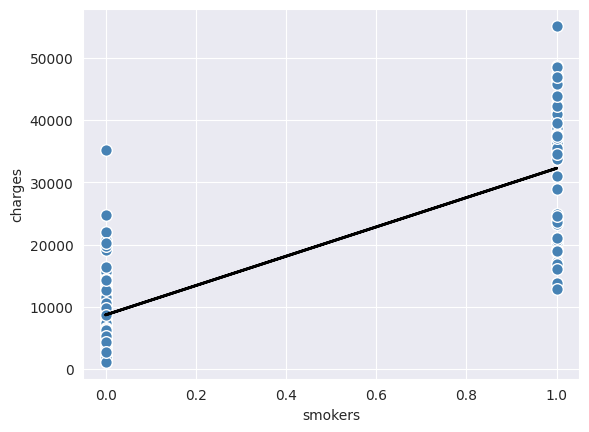

In [ ]:
lin_regplot(X_test, y_test, slr)
plt.xlabel('smokers')
plt.ylabel('charges')
plt.show()